In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
from sklearn.model_selection import KFold
import matplotlib.pyplot  as plt
from sklearn.metrics import confusion_matrix, roc_auc_score

In [3]:
data=pd.read_csv('Final_2_Dec.csv',index_col=0)
data=data.drop('YEAR',axis=1)
data.columns

Index(['DEP_TIME', 'WIND_SPEED', 'RAIN', 'SNOW', 'SNOW_DEPTH', 'TAVG', 'FOG',
       'HEAVY_FOG', 'THUNDER', 'HAIL', 'GLAZE', 'HAZE', 'BLOWING_SNOW', 'Y',
       'HOLIDAY', '9E', 'AA', 'AS', 'B6', 'DL', 'HA', 'MQ', 'OH', 'OO', 'VX',
       'YX', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')

In [4]:
data=data.drop(['WIND_SPEED', 'RAIN', 'SNOW', 'SNOW_DEPTH', 'TAVG', 'FOG',
       'HEAVY_FOG', 'THUNDER', 'HAIL', 'GLAZE', 'HAZE', 'BLOWING_SNOW','HOLIDAY' ],axis=1)

In [5]:
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(data.drop('Y',axis=1), data['Y'], test_size=0.25)

In [25]:
from sklearn import metrics
lr=LogisticRegression().fit(X_train,y_train)
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, lr.predict_proba(X_test)[:,1])
lr_auc=roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'TP rate')

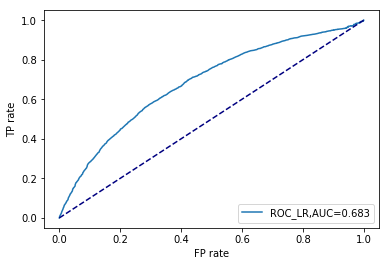

In [26]:
fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(111)
plt.plot( fpr_lr,tpr_lr, label='ROC_LR,AUC={}'.format(round(lr_auc,3)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc = 4)
ax.set_xlabel('FP rate')
ax.set_ylabel('TP rate')

In [27]:
confusion_matrix(y_test,lr.predict(X_test) )

array([[40420,    60],
       [ 9772,    85]])

In [28]:
9772/(40420+9772)

0.19469238125597704

In [10]:
(40420+85)/(40420+9772+60+85)

0.8046764805212865

In [11]:
confusion_matrix(y_test,np.zeros(50337))

array([[40480,     0],
       [ 9857,     0]])

In [13]:
y_test.shape

(50337,)

In [12]:
9857/(9857+40480)

0.19582017204044738